<a href="https://colab.research.google.com/github/Shaheer04/Neural-Networks-Practice/blob/main/Neurons_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid


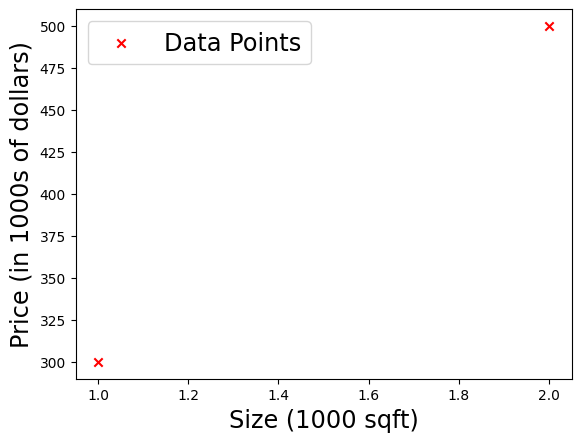

In [ ]:
X_train = np.array([[1.0],[2.0]], dtype=np.float32)          #(size in 1000 square feet)
Y_train = np.array([[300.0],[500.0]], dtype=np.float32)      #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend(fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()


In [ ]:
 # making a  single layer with one unit/ neuron in it to compare it with linear regression function
 linear_layer = tf.keras.layers.Dense(units=1, activation= 'linear', )

In [ ]:
linear_layer.get_weights()

[]

There are no weights as the weights are not yet instantiated. Let's try the model on one example in **X_train**. This will trigger the instantiation of the weights. Note, the input to the layer must be **2-D**, so we'll reshape it.

In [ ]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[0.48204434]], shape=(1, 1), dtype=float32)


The result is a tensor (another name for an array) with a shape of (1,1) or one entry.
Now let's look at the weights and bias. These weights are randomly initialized to small numbers and the bias defaults to being initialized to zero.

In [ ]:
w, b = linear_layer.get_weights()
print(f"w = {w}, b = {b}")

w = [[0.48204434]], b = [0.]


The weights are initialized to random values so let's set them to some known values.

In [ ]:
set_w = np.array([[200]])
set_b = np.array([100])

#set weights

linear_layer.set_weights([set_w,set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


Let's compare equation (1) to the layer output.

In [ ]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


They produce the same values! Now, we can use our linear layer to make predictions on our training data.

In [ ]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, set_w) + set_b

Text(0.5, 0, 'Size (1000 sqft)')

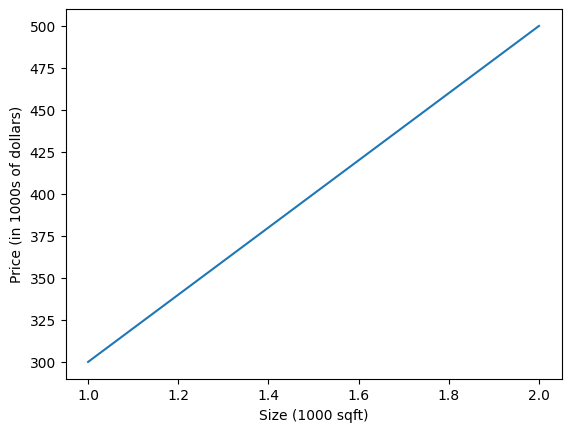

In [ ]:
plt.plot(X_train,Y_train)
plt.ylabel("Price (in 1000s of dollars)")
plt.xlabel("Size (1000 sqft)")

Text(0.5, 0, 'Size (1000 sqft)')

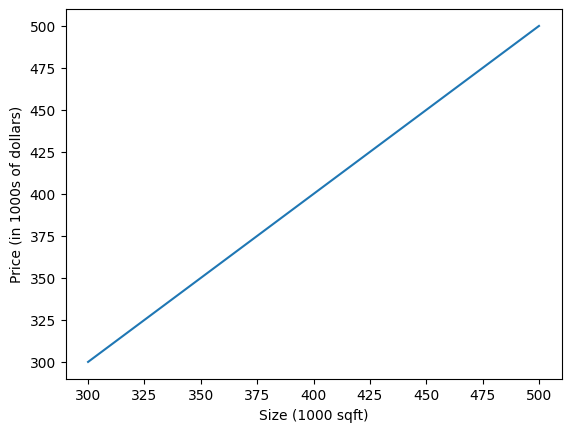

In [ ]:
plt.plot(prediction_tf,prediction_np)
plt.ylabel("Price (in 1000s of dollars)")
plt.xlabel("Size (1000 sqft)")

**Neuron with Sigmoid Function**

In [ ]:
X_train = np.array([0,1,2,3,4,5], dtype=np.float32).reshape(-1,1) # 2-D Matrix
Y_train = np.array([0,0,0,1,1,1], dtype=np.float32).reshape(-1,1) # 2-D Matrix

In [ ]:
pos = Y_train == 1
neg = Y_train == 0
X_train[pos]

array([3., 4., 5.], dtype=float32)

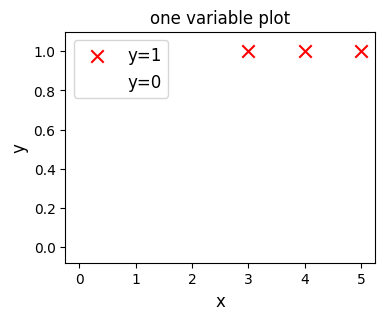

In [ ]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c= 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0",facecolors='none',
           edgecolors=dlc["dlblue"],lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

**Logistic Neuron**
We can implement a 'logistic neuron' by adding a sigmoid activation. The function of the neuron is then described by (2) above.
This section will create a Tensorflow Model that contains our logistic layer to demonstrate an alternate method of creating models. Tensorflow is most often used to create multi-layer models. The Sequential model is a convenient means of constructing these models.

In [ ]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

model.summary() shows the layers and number of parameters in the model. There is only one layer in this model and that layer has only one unit. The unit has two parameters,  𝑤
  and  𝑏
 .

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[-1.0985799]] [0.]
(1, 1) (1,)


In [ ]:
set_w = np.array([[2]])
set_b = np.array([-4.5])

#set weights takes a list of numpy arrays
logistic_layer.set_weights([set_w,set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [ ]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = np.dot(set_w,X_train[0].reshape(1,1)) + set_b  # here need to add "sigmoidnp" to get the desired result
print(alog)

1/1 [==============================] - 0s 56ms/step
[[0.01098694]]
[[-4.5]]


ValueError: ignored

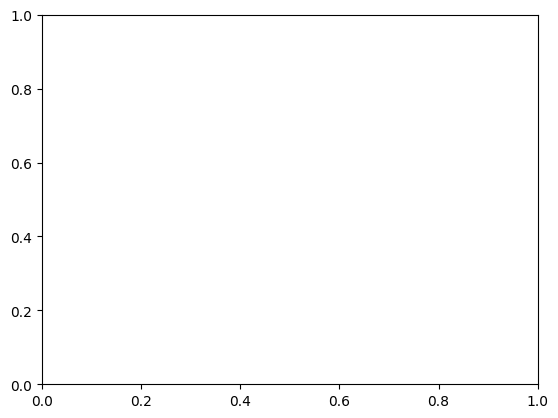

In [ ]:
plt.plot(X_train, Y_train, model, set_w, set_b, pos, neg) # not the right plot "plt_logistic" should be here